In [80]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import requests, zipfile, StringIO
import scipy.stats

%matplotlib inline

In [5]:
datestring = ['201505', '201507', '201509']
df = pd.DataFrame()
for month in datestring:
    r = requests.get('https://s3.amazonaws.com/tripdata/'+ month + '-citibike-tripdata.zip')
    z = zipfile.ZipFile(StringIO.StringIO(r.content))
    df_temp = pd.read_csv(z.open(month +'-citibike-tripdata.csv'))
    df = df.append(df_temp, ignore_index=True)

df.shape

(3337361, 15)

In [8]:
df['age'] = 2016 - df['birth year'][(df['usertype'] == 'Subscriber')]

In [29]:
df_age = df.age
df_age.dropna(inplace= True)
df_age.reset_index(drop=True, inplace= True)

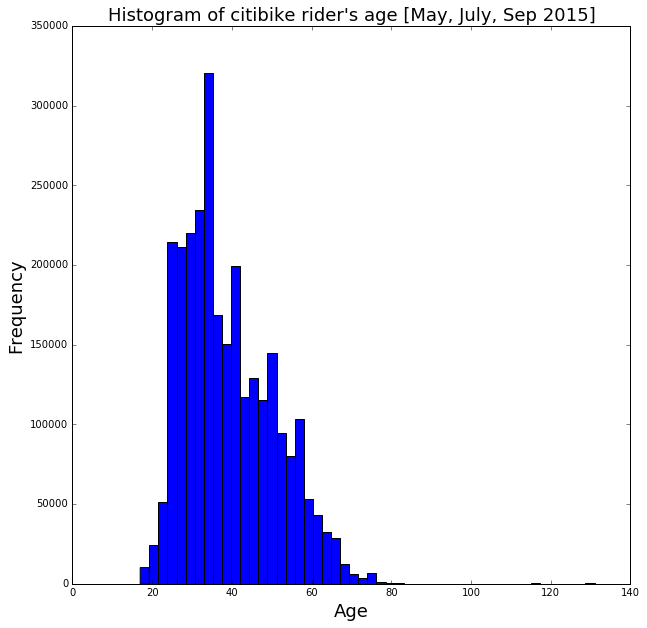

In [72]:
plt.figure(figsize=(10,10))
plt.hist(df_age,50)
plt.xlabel("Age", size = 18)
plt.ylabel('Frequency', size = 18)
plt.title("Histogram of citibike rider's age [May, July, Sep 2015]", size=18)
plt.show()

## Figure 1
Histogram showing the age distribution of citibike riders. May, July and September 2015.

## Kolmogorov-Smirnov test
The Kolmogorov-Smirnov test for goodness of fit tests whether the distribution of an observed random variable [G(x)] matches a given distribution [F(x)]. The null hypothesis suggests that the two distributions are identical, which is mathematically formulated as follows:

$$H_{0}: G(x) = F(x)$$


$$H_{1}: G(x) \neq F(x)$$

In [55]:
ks_norm = scipy.stats.kstest(df_age, 'norm')
print ks_norm

KstestResult(statistic=1.0, pvalue=0.0)


In [69]:
m = df_age.mean()
ks_alpha = scipy.stats.kstest(df_age, 'gamma', args=(m,))
print ks_alpha

KstestResult(statistic=0.22966688029875648, pvalue=0.0)


In the cells above, I test if the age of citibike riders follows (a) a gaussian, or (b) a gamma distribution. In both cases the Kolmogorov-Smirnov test __p-value is 0__, giving us evidence to reject the null hypothesis that the distribution of the data is the same as the tested one. 

Note that unlike the gaussian, when kstest tests another distribution it needs the input of additional arguments. In this case I add the distribution mean.

## Anderson-Darling test
The Anderson-Darling test, is a variation of KS and test the exact same hypothesis, that the distribution of the data is identical to a pre-defined distribution (in Python's implementation the AD test accepts fewer number of distributions, compared to KS). It is considered more powerful, since it is more sensitive in the tails of the distribution (i.e. handling outliers better).

In [73]:
scipy.stats.anderson(df_age, dist='norm')

AndersonResult(statistic=40464.503327151295, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

In [94]:
scipy.stats.anderson(df_age, dist='expon')

AndersonResult(statistic=658835.5717269117, critical_values=array([ 0.922,  1.078,  1.341,  1.606,  1.957]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

The function scipy.stats.anderson returns the test statistic. To decide whether the null hypothesis is holds or not, we compare the test statistic with the critical value (for the desired significance level). If the test statistic is higher than the critical value, there are evidence to reject the null hypothesis.

In this case, both for the gaussian and the exponential distribution the AD statistic is a lot higher than the critical values for all significance levels, so we reject that the our age data come from either gaussian or exponential distribution.